In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import langevin
from scipy.stats import pearsonr

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

SEED = 35010732 # from random.org
np.random.seed(SEED)

print(plt.style.available)
plt.style.use('seaborn-white')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [3]:
def correlated_ts(c,delta_t = 0.1,N=1000):
    # parameters for coupled oscillator
    K,D = 1.0,1.0
    data1 = langevin.time_series(A=1/K, D=D, delta_t=delta_t, N=N)
    data2 = langevin.time_series(A=1/(K+np.abs(c)), D=D, delta_t=delta_t, N=N)
    x1 = (data1 + data2)/2
    if c>0:
        x2 = (data1 - data2)/2
    else:
        x2 = (data2-data1)/2

    return x1,x2

def c_rho(rho):
    return 2*np.abs(rho)/(1-np.abs(rho))*np.sign(rho)


In [22]:
pearson_list = []
M = 1000
N = int(28/0.8)
print(N)
delta_t = 0.2
rho = 0.3
for i in range(M):
    x1,x2 = correlated_ts(c_rho(rho),delta_t=delta_t,N=N)
    pearson_list.append(pearsonr(x1,x2)[0])
pearson_list = np.array(pearson_list)

35


(array([0.01289621, 0.12896214, 0.28371671, 0.78022097, 0.95431986,
        1.21869225, 1.23803657, 1.14776307, 0.58677775, 0.09672161]),
 array([-0.67969048, -0.52460621, -0.36952194, -0.21443767, -0.0593534 ,
         0.09573088,  0.25081515,  0.40589942,  0.56098369,  0.71606796,
         0.87115223]),
 <a list of 10 Patch objects>)

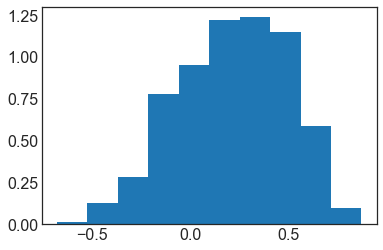

In [23]:
plt.hist(pearson_list,density=True)

In [24]:
print(pearson_list.mean(),pearson_list.std())

0.21667848959771924 0.27761230332890907


In [30]:
pearson_list2 = []
M = 1000
N = int(28/0.8)
delta_t = 0.3
rho = 0.3
for i in range(M):
    x1,x2 = correlated_ts(c_rho(rho),delta_t=delta_t,N=M)
    pearson_list2.append(pearsonr(x1,x2)[0])
pearson_list2 = np.array(pearson_list2)

(array([0.09898556, 0.65990376, 1.71574978, 4.38836   , 7.09396542,
        8.11681625, 6.92898948, 3.13454286, 0.75888932, 0.09898556]),
 array([0.13927661, 0.16958406, 0.19989151, 0.23019896, 0.26050641,
        0.29081386, 0.32112131, 0.35142876, 0.38173621, 0.41204366,
        0.44235111]),
 <a list of 10 Patch objects>)

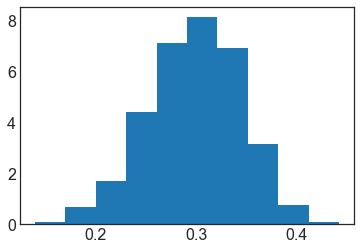

In [31]:
plt.hist(pearson_list2,density=True)

In [32]:
print(pearson_list2.mean(),pearson_list2.std())

0.2982021125520271 0.04604440622870032


In [33]:
print((pearson_list2.mean()-pearson_list.mean())/pearson_list2.mean())

0.27338378744746317
